<a href="https://colab.research.google.com/github/vadillo87/EJERCICIOS-QUINCENA-1/blob/main/practicas/practica3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 3
* Puede resolver aquí los ejercicios abriendo una celda después de cada uno de los enunciados.  
* Por favor, documente la solución de los ejercicios añadiendo suficientes **comentarios** del programador que expliquen el código.

## Ejercicio 3.1. Trabajar con un DataSet
* Obtener un dataset, preferiblemente con datos financieros, actuariales, económicos o estadísticos.
* Crear un modelo de análisis de los datos, utilizando las librerías principales para el análisis de datos, por ejemplo:
    - NumPy
    - Pandas
    - Matplotlib

## Ejercicio 3.2. Gráfico histórico de un índice o valor bursátil
* Descargar un archivo con formato ***csv*** de la página de Yahoo Finanzas con la cotización de:
 - un índice (IBEX, NASDAQ, ...) o
 - valor bursátil,
* o bien, de otra fuente disponible.
* Crear un procedimiento que lea el fichero y finalmente obtenga un gráfico del histórico del índice o valor.
* Tomar el periodo histórico más largo posible.
* Alternativamente o adicionalmente, si disponemos de una API o fuente de información diferente de un *csv* descargado de forma manual, también se podría realizar de una forma más automatizada.

## Ejercicio 3.3. Trabajar con la Librería openpyxl
* Crear una aplicación programada en Python que permita interactuar con la **hoja de cálculo** tanto para lectura, como para escritura.
* Utilice la Librería openpyxl, u otra que considere adecuada para interactuar con hoja de cálculo

## Ejercicio 3.4. Librería actuarial
* Utilizando la librería actuarial **pyliferisk**, o cualquier otra que considere adecuada en este campo, cree un caso donde se muestren diferentes cálculos y procedimientos que se puedan realizar con ella.
* Alternativamente, puede realizar su propia librería actuarial y probarla creando ejemplos prácticos. En este caso, no olvide documentar la funcionalidad de los métodos que programe, utilizando POO.

In [ ]:
!pip install pyliferisk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


----------------AÑO LIMITE TABLA---------------
120
115
----------------LX AÑO A AÑO---------------
[100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 100000.0, 99842.15, 99682.891786535, 99523.33934994147, 99364.59962367831, 99207.75260317232, 99053.95082431163, 98904.43879093742, 98759.61302121585, 98618.99908419624, 98482.11591346738, 98348.43628932645, 98217.38699797093, 98088.3588166717, 97960.66739116416, 97833.6319976913, 97706.49719291029, 97578.4625989887, 97448.6930015783, 97316.29920726636, 97180.34833727381, 97039.88386178711, 96893.88735651705, 96741.24072637559, 96580.73733388646, 96411.08361068575, 96230.85273098393, 96038.5546179716, 95832.59993759336, 95611.2649647775, 95372.52363616045, 95113.99733633992, 94832.9830312097, 94526.43541356132, 94191.03671542693, 93823.1547833275, 93418.89895631257, 92974.16894594114, 92484.61345935629, 91945.71486518996, 91352.90406316814

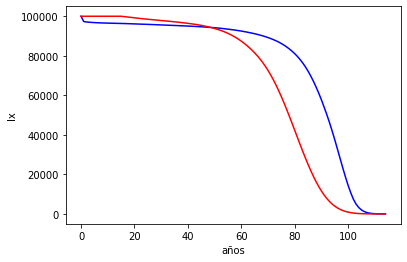

In [ ]:
from pyliferisk import MortalityTable
from pyliferisk.mortalitytables import GKM95, SPAINPERM2000
import matplotlib.pyplot as plt
from pyliferisk import *

#comparamos la tabla GKM95 con la nueva tabla introducida por la DGS mas actualizada
tabGK = MortalityTable(nt=GKM95)
tabPERM = MortalityTable(nt=SPAINPERM2000)

#vamos a ver hasta que edad duran las tablas
print("----------------AÑO LIMITE TABLA---------------")
print(tabGK.w)
print(tabPERM.w)

#lanzamos sus lx de toda la tabla 
print("----------------LX AÑO A AÑO---------------")
print(tabGK.lx)
print(tabPERM.lx)

#comprobamos con la lx si coincide con la tasa de mortalidad
print("----------------Qx CALCULADA POR LAS Lx---------------")
print((tabGK.lx[50]-tabGK.lx[51])/tabGK.lx[50])
print((tabPERM.lx[50]-tabPERM.lx[51])/tabPERM.lx[50])

#vemos como coincide la qx 
print("----------------Qx segun libreria Python---------------")
print(tabGK.qx[50] / 1000)
print(tabPERM.qx[50] / 1000)

#observamos como la tabla PERM azul es menos agresiva (mas barata) que la GK, esto tiene sentido porque según pasan los años la Esperanza de Vida es mayor.

x = range(0, tabPERM.w)
y = tabPERM.lx[:tabPERM.w]
z = tabGK.lx[:tabPERM.w]
plt.plot(x,y, color = 'blue')
plt.plot(x,z, color = 'red')
plt.ylabel('lx')
plt.xlabel('años')

#adicionalmente vamos a ver un producto de vida a 10 años, prima unica. 
#Este producto nos sirve para poder obtener a modo ejemplo como se puede calcular la dotación por tablas que realizan las empresas aseguradoras de vida. 
#En este caso sale menos Provisión (consideramos que la provisión matemátic es la prima)y por lo tanto no se dota insuficiencia de tablas, pero hay muchas situaciones
#en las que si se debe dotar provision.

print("----------------IMPACTO TABLAS---------------")

nt1 = Actuarial(nt=GKM95, i=0.06)
x = 30
n = 10
C = 1000

print(C * (Axn(nt1, x, n) ))

nt2 = Actuarial(nt=SPAINPERM2000, i=0.06)
x = 30
n = 10
C = 1000

print(C * (Axn(nt2, x, n) ))


#Por ultimo tambien vamos a comprobar aunque no es exactamente así porque las polizas y las carteras estan casadas y se hace solo con la parte de la cola no casada.
print("----------------IMPACTO TIPOS---------------")
nt3 = Actuarial(nt=SPAINPERM2000, i=0.0054)
x = 30
n = 10
C = 1000

print(C * (Axn(nt3, x, n) ))

nt4 = Actuarial(nt=SPAINPERM2000, i=0.0046)
x = 30
n = 10
C = 1000

print(C * (Axn(nt4, x, n) ))

print("----------------Comparativa grafica entre las dos tablas AZUL(PERM) ROJA(GKM95)---------------")

## Ejercicio 3.5. Trabajar con una API
* Localizar una API con datos que puedan resultar de interés.
* Crear una aplicación programada en Python que utilice los datos de la API, preferiblemente con datos en tiempo real.
* Mostrar la información que nuestra aplicación pueda procesar, según ciertos filtros, que faciliten el uso de la API.

## Ejercicio 3.6. Página web con Flask
* Crear una aplicación de página web programada en Python con el framework Flask.
* Puede desplegarla en alguna plataforma gratuita como, por ejemplo, [Pythonanywhere](https://www.pythonanywhere.com) o [Heroku](https://www.heroku.com).

## Ejercicio 3.7. Bot de Telegram que proporciona cotizaciones en tiempo real
Crear un Bot de Telegram programado en Python que realizando **Web Scraping** nos pueda dar precios en tiempo real de valores cotizados en bolsa, o en mercados financieros internacionales.  
Adjuntar capturas de pantalla mostrando el funcionamiento del bot en Telegram.

## Ejercicio 3.8. Estrategias de Trading
* Elegir una compañía cotizada y realizar con ella diferentes estrategias de trading, con gráficos e indicadores bursátiles.
* Puede utilizar la librería TA-Lib u otro sistema para efectuar el análisis.

In [3]:
!pip install talib-binary   # para cargar la librería TA-Lib en el entorno de Colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 7.1 MB/s 


In [2]:
!pip install yfinance       # para cargar la librería de Yahoo finance en el entorno de Colab
                            # si da error, ejecutar una segunda vez

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 12.8 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
import talib as ta                # importamos la librería con el alias ta
import numpy as np
import matplotlib.pyplot as plt   # importamos pyplot de la librería matplotlib con el alias plt
import yfinance as yf             # importamos la librería de Yahoo finance con el alias yf

telef = yf.Ticker("TEF")

# Obtener información de mercado de un ticker concreto (TELEFONICA)
telef.info         # información sobre TELEFONICA

{'52WeekChange': 0.074468136,
 'SandP52WeekChange': -0.11075044,
 'address1': 'Distrito Telefónica',
 'address2': 'Ronda de la Comunicación, s/n',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 5.1,
 'askSize': 21500,
 'averageDailyVolume10Day': 1658360,
 'averageVolume': 1835098,
 'averageVolume10days': 1658360,
 'beta': 0.763429,
 'beta3Year': None,
 'bid': 5.09,
 'bidSize': 36200,
 'bookValue': 4.381,
 'category': None,
 'circulatingSupply': None,
 'city': 'Madrid',
 'coinMarketCapLink': None,
 'companyOfficers': [],
 'country': 'Spain',
 'currency': 'USD',
 'currentPrice': 5.085,
 'currentRatio': 0.891,
 'dateShortInterest': 1655251200,
 'dayHigh': 5.13,
 'dayLow': 5.08,
 'debtToEquity': 154.439,
 'dividendRate': 0.4,
 'dividendYield': 0.0797,
 'earningsGrowth': -0.176,
 'earningsQuarterlyGrowth': -0.203,
 'ebitda': 7573799936,
 'ebitdaMargins': 0.19204001,
 'enterpriseToEbitda': 10.12,
 'enterpriseToRevenue': 1.943,
 'enterpriseValu

In [6]:
# OBTENEMOS LA INFORMACIÓN HISTORICA DESDE EL INICIO HASTA EL DIA DE HOY (MAXIMO, MINIMOS, APERTURA, CIERRE, VOLUMEN Y DIVIDENDOS)
hist = telef.history(period="max")
print(hist)

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
1987-06-12  0.450141  0.468045  0.439911  0.460372  50527023        0.0   
1987-06-15  0.473160  0.475718  0.460372  0.462930  17437104        0.0   
1987-06-16  0.462930  0.462930  0.442469  0.445026  14805088        0.0   
1987-06-17  0.450141  0.450141  0.442469  0.447584   4271542        0.0   
1987-06-18  0.447584  0.468045  0.447584  0.468045   8514571        0.0   
...              ...       ...       ...       ...       ...        ...   
2022-06-23  5.000000  5.040000  4.960000  5.010000   1604700        0.0   
2022-06-24  5.000000  5.040000  5.000000  5.030000    999000        0.0   
2022-06-27  5.030000  5.070000  5.010000  5.020000   1381700        0.0   
2022-06-28  5.120000  5.140000  5.040000  5.050000   1816400        0.0   
2022-06-29  5.110000  5.130000  5.080000  5.085000    700551        0.0   

            Stock Splits

In [8]:
#RESULTADOS ANUALES INGRESOS E INGRESOS NETOS ()
telef.earnings


,Revenue,Earnings
Year,,
2018,49508000000,3331000000
2019,49312000000,1142000000
2020,43949000000,1582000000
2021,40048000000,8137000000


In [9]:
#RESULTADOS TRIMESTRALES 

telef.quarterly_earnings

,Revenue,Earnings
Quarter,,
2Q2021,9574000000,7743000000
3Q2021,9689000000,706000000
4Q2021,10445000000,-1198000000
1Q2022,10046800000,706000000


In [13]:
# INFORMACION SIMILIR AL HISTORICO, PERO AQUI DELIMITAMOS POR FECHA Y OBTENEMOS EL ADJ AL CIERRE DEL DIA

telef = yf.download('TEF', start='2019-1-1', end='2022-6-30' )
print(telef)

[*********************100%***********************]  1 of 1 completed
            Open  High   Low  Close  Adj Close   Volume
Date                                                   
2019-01-02  8.35  8.51  8.34   8.49   6.777009  1692700
2019-01-03  8.58  8.67  8.55   8.60   6.864815  1830800
2019-01-04  8.72  8.81  8.70   8.77   7.000515  1886700
2019-01-07  8.81  8.92  8.78   8.89   7.096303  1450800
2019-01-08  8.83  8.89  8.77   8.87   7.080338  1813200
...          ...   ...   ...    ...        ...      ...
2022-06-23  5.00  5.04  4.96   5.01   5.010000  1604700
2022-06-24  5.00  5.04  5.00   5.03   5.030000   999000
2022-06-27  5.03  5.07  5.01   5.02   5.020000  1381700
2022-06-28  5.12  5.14  5.04   5.05   5.050000  1816400
2022-06-29  5.11  5.13  5.08   5.09   5.090000   750092

[880 rows x 6 columns]


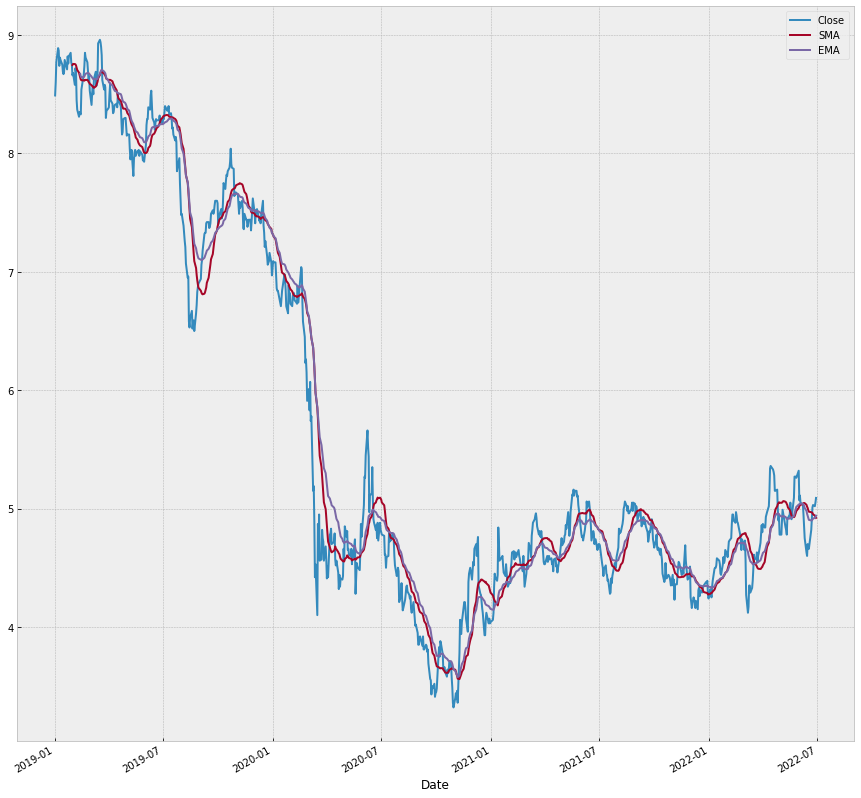

In [23]:
# MEDIA MOVIL ESTANDAR es SMA, La usaremos de 30 periodos (SIN PONDERACION SEGUN SUS FECHAS)
telef['SMA'] = ta.SMA(telef.Close.values, 21) 

# MEDIA MOVIL EXPONENCIAL se llama EMA, la pondremos de 30 periodos (PONDERANDO SUS FECHAS)
telef['EMA'] = ta.EMA(telef.Close.values, 30)

# plot
telef[['Close', 'SMA', 'EMA']].plot(figsize=(15, 15))
plt.show()

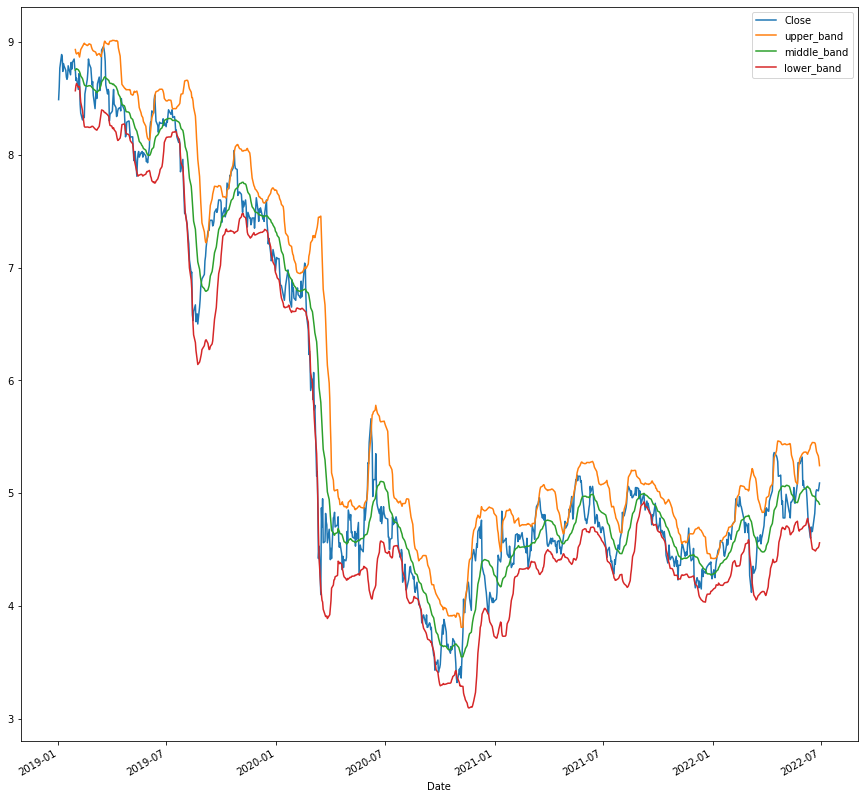

In [15]:
# bandas BOLLINGER (LINEA DEL MEDIO = MEDIA, LINEA ALTA = DESVIACION TIPICA VALOR 2 + MEDIA MOVIL, LINEA BAJA= DESVIACION TIPICA VALOR 2 - MEDIA MOVIL
# ESTAS LINEAS POR REGLA GENERAL NOS INDICAN QUE EL 90% DE LA COTIZACION A CIERRE ESTA ENTRE ELLAS Y COMO VEMOS EN EL GRAFICO SE VE QUE ES ASI.
telef['upper_band'], telef['middle_band'], telef['lower_band'] =  ta.BBANDS(telef['Close'], timeperiod=20)
telef[['Close', 'upper_band', 'middle_band', 'lower_band']].plot(figsize=(15, 15))
plt.show()

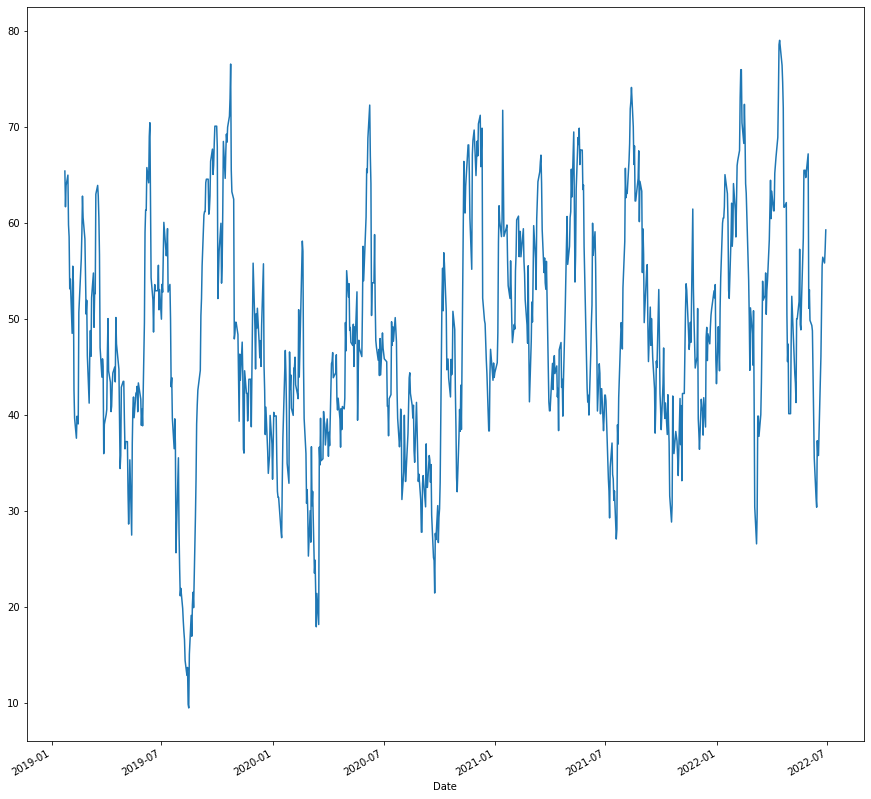

In [16]:
# RSI Indice Fuerza Relativa (NOS INDICA LA FUERZA CON LA QUE SUBEN Y BAJAN LOS PRECIOS, ASI COMO CUALES SON LAS ZONAS DE SOBRECOMPRA >70 Y SOBREVENTA <30)
telef['RSI'] = ta.RSI(telef.Close, 14)
telef['RSI'].plot(figsize=(15, 15))
plt.show()

## Ejercicio 3.9. Finanzas
Estudie casos en el campo de las finanzas:
* VAN y TIR
* Cuadro de amortización de préstamos
* Operativa con activos de Renta Fija: bonos
* *Duration*
* Estructura Temporal de los Tipos de Interés (ETTI)
* Forwards sobre tipos de interés
* Arbitraje
* Random Walk en una y dos dimensiones
* ... / ...


## Ejercicio 3.10. Valoración de opciones financieras
* Método de valoración de opciones europeas mediante arbol binomial
* Método de Black-Scholes
* Convergencia de ambos métodos
* Gráfico de convergencia
* Arbitraje en caso de no cumplirse la paridad Put-Call